## 2019 disease tracking 

In [14]:
library(tidyverse)
library(vegan)
library(phyloseq)
library(dplyr)
library(ggplot2)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-5



In [9]:
# Graph of colonies that died/got diseased across the years
# x-axis year
# y-axis # of colonies
# stacked bar colors: healthy, diseased, dead

In [10]:
# 1st: create columns for each year 
# pull info from diseaseddate
# if healthy, write healthy in each column
# if date, write "diseased" in corresponding column, and "healthy" in previous years columns
# repeat for mortality 

In [2]:
getwd()

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/CBC_metagenomics/mcav1"

In [3]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata')

In [5]:
colony_data <- read.csv('CBC_ColonyData.csv')

In [6]:
colony_data <- colony_data[, -1]

In [7]:
# extract year from Date_InitialTag and add it to new column
colony_data$Year_tagged <- format(as.Date(colony_data$Date_InitialTag, format="%m/%d/%y"), "%Y")

In [8]:
head(colony_data)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,X112023_Condition,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,COLONIES_TO_LOOK_AT,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,Diseased,,Diseased,,Diseased,,Diseased,,,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,CLB,100%,CLB,100%,Dead,,TL,90%,,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,"CLP,CLB","5%,95%",CLP,80%,CLP,,CLB,98%,,2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,Dead,,Dead,,Dead,,Dead,,,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,Diseased,,Diseased,,Diseased,,Diseased,,,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,Dead,,Dead,,Dead,,Dead,,,2019


In [9]:
# get subset of colonies tagged in 2019 (to be able to track since the beginning)
colonies_2019 <- subset(colony_data, colony_data$Year_tagged=="2019")
head(colonies_2019)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,X112023_Condition,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,COLONIES_TO_LOOK_AT,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,Diseased,,Diseased,,Diseased,,Diseased,,,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,CLB,100%,CLB,100%,Dead,,TL,90%,,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,"CLP,CLB","5%,95%",CLP,80%,CLP,,CLB,98%,,2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,Dead,,Dead,,Dead,,Dead,,,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,Diseased,,Diseased,,Diseased,,Diseased,,,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,Dead,,Dead,,Dead,,Dead,,,2019


In [10]:
# drop NA in Date disease and mortality section
na<-is.na(colonies_2019$Date_DocumentedDisease)
na2 <- is.na(colonies_2019$Date_DocumentedMortality)
samples_to_delete <- na & na2
sum(samples_to_delete)

[1] 3

In [11]:
# first look at them to see why they have NAs
colonies_2019[samples_to_delete,]
# looks like they were never found again after 2019, so removing

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,X112023_Condition,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,COLONIES_TO_LOOK_AT,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
77,6/25/19,SR30N,2,347,NA,PAST,19.8,1.9,left,4,⋯,Healthy,,Healthy,,Healthy,,Healthy,,THIS_ONE,2019
132,6/23/19,Lagoon,3,12flag,not_found,PAST,10.7,0.9,left,3,⋯,Healthy,,Healthy,,Healthy,,Healthy,,,2019
133,6/23/19,Lagoon,3,24,not_found,SSID,31.7,2.8,right,3,⋯,Healthy,,Healthy,,Healthy,,Healthy,,,2019


In [15]:
# Remove rows where both Date_DocumentedDisease and Date_DocumentedMortality are NA
colonies_2019_delete <- colonies_2019 %>%
  filter(!(is.na(Date_DocumentedDisease) & is.na(Date_DocumentedMortality)))
nrow(colonies_2019_delete)
tail(colonies_2019_delete)

[1] 103

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,X112023_Condition,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,COLONIES_TO_LOOK_AT,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
98,6/23/19,Lagoon,3,23,33,SSID,31.7,1.1,right,3,⋯,"CLP,CLB","10%,5%",Healthy,,"CLP,CLB",,Healthy,,,2019
99,6/23/19,Lagoon,3,27,34,PAST,37.0,2.0,right,3,⋯,CLP,10%,Healthy,,CLP,,Healthy,,,2019
100,6/23/19,Lagoon,3,29,35,MMEA,38.5,3.0,right,2,⋯,Dead,,Dead,,Dead,,Dead,,,2019
101,6/23/19,Lagoon,3,25,36,SSID,37.4,3.7,right,3,⋯,Diseased,,Diseased,,Diseased,,Diseased,,,2019
102,6/23/19,Lagoon,3,28,37,SSID,40.0,1.2,left,3,⋯,Diseased,,Diseased,,Diseased,,Diseased,,,2019
103,6/23/19,Lagoon,3,378,not_found,MMEA,21.9,4.5,left,4,⋯,Healthy,,Healthy,,Healthy,,Healthy,,THIS_ONE - date mortality?,2019


In [17]:
# find rows with entries in COLONIES_TO_LOOK_AT
questionable_colonies <- colonies_2019_delete %>%
  filter(!is.na(COLONIES_TO_LOOK_AT) & COLONIES_TO_LOOK_AT != "")
# Display 
questionable_colonies
# all mmea with no data on mortality, so deleting for now 

Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,X112023_Condition,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,COLONIES_TO_LOOK_AT,Year_tagged
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6/22/19,SR30N,2,311,NA,MMEA,14.6,2.3,right,3,⋯,Healthy,,Healthy,,Healthy,,Healthy,,THIS_ONE - date mortality?,2019
6/22/19,SR30N,2,325,not_found,MMEA,11.0,3.8,left,4,⋯,Healthy,,Healthy,,Healthy,,Healthy,,THIS_ONE - date mortality?,2019
6/23/19,Lagoon,3,378,not_found,MMEA,21.9,4.5,left,4,⋯,Healthy,,Healthy,,Healthy,,Healthy,,THIS_ONE - date mortality?,2019


In [23]:
# delete questionable colonies
colonies_2019 <- colonies_2019_delete %>%
  filter(is.na(COLONIES_TO_LOOK_AT) | COLONIES_TO_LOOK_AT == "")
#remove column too
colonies_2019$COLONIES_TO_LOOK_AT <- NULL

#look at condition columns
condition_columns <- colonies_2019 %>%
  select(matches("Condition"))

colonies_2019[, c(names(condition_columns), "Date_DocumentedDisease", "Date_DocumentedMortality")]


X062019_Condition,X052022_Condition,X122022_Condition,X052023_Condition,X092023_Condition,X112023_Condition,X122023_Condition,X012024_Condition,X022024_Condition,Date_DocumentedDisease,Date_DocumentedMortality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,5/21/22,Diseased
Healthy,Healthy,Healthy,Healthy,CLP,CLB,CLB,Dead,TL,Healthy,Healthy
Healthy,Diseased,Diseased,Diseased,"CLP,CLD","CLP,CLB",CLP,CLP,CLB,5/21/22,Diseased
Healthy,Diseased,Dead,Dead,Dead,Dead,Dead,Dead,Dead,5/21/22,12/2/22
Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,5/21/22,Diseased
Healthy,Healthy,Diseased,Diseased,Dead,Dead,Dead,Dead,Dead,12/2/22,9/25/23
Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy,Healthy
Healthy,Diseased,Diseased,Diseased,Dead,Dead,Dead,Dead,Dead,5/21/22,9/25/23
Healthy,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,Diseased,5/21/22,Diseased


### Graph for disease 2019 - 5/2023 

In [34]:
head(colonies_2019)
colnames(colonies_2019)

,Date_InitialTag,Transect,TransectNum,OldTagNum,NewTagNum,Species,Meter,Meters_90,Direction,Size_Class,⋯,X092023_Percentage,X112023_Condition,X112023_Percentage,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,Year_tagged
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,6/21/19,CBC30N,1,349,1,SSID,1.5,0.50,right,5,⋯,,Diseased,,Diseased,,Diseased,,Diseased,,2019
2,6/21/19,CBC30N,1,334,2,PAST,1.4,0.10,left,4,⋯,90%,CLB,100%,CLB,100%,Dead,,TL,90%,2019
3,6/21/19,CBC30N,1,346,3,SSID,6.3,0.80,right,5,⋯,"80%,80%","CLP,CLB","5%,95%",CLP,80%,CLP,,CLB,98%,2019
4,10/15/19,CBC30N,1,407,4,PSTR,6.5,0.50,right,3,⋯,,Dead,,Dead,,Dead,,Dead,,2019
5,6/24/19,CBC30N,1,394,5,SSID,4.3,1.20,left,5,⋯,,Diseased,,Diseased,,Diseased,,Diseased,,2019
6,10/15/19,CBC30N,1,413,6,PSTR,8.3,1.75,left,NA,⋯,,Dead,,Dead,,Dead,,Dead,,2019


[1] "Date_InitialTag"          "Transect"                
 [3] "TransectNum"              "OldTagNum"               
 [5] "NewTagNum"                "Species"                 
 [7] "Meter"                    "Meters_90"               
 [9] "Direction"                "Size_Class"              
[11] "Notes_June_2019"          "MaxDiameter"             
[13] "Height"                   "Date_DocumentedDisease"  
[15] "Date_DocumentedMortality" "Notes_May2022"           
[17] "Sept_2023"                "Nov_2023"                
[19] "Dec_2023"                 "Jan_2024"                
[21] "Feb_2024"                 "X062019_Condition"       
[23] "X062019_Percentage"       "X052022_Condition"       
[25] "X122022_Condition"        "X052023_Condition"       
[27] "X092023_Condition"        "X092023_Percentage"      
[29] "X112023_Condition"        "X112023_Percentage"      
[31] "X122023_Condition"        "X122023_Percentage"      
[33] "X012024_Condition"        "X012024_Percentage"      
[35] "X022024_Condition"        "X022024_Percentage"      
[37] "Year_tagged"

In [75]:
# select columns up to where disease stops and bleaching starts - 05/2023
disease_columns <- names(colonies_2019)[names(colonies_2019) %in% c('X062019_Condition', 'X052022_Condition', 'X122022_Condition', 'X052023_Condition')]
disease_df<-colonies_2019[,disease_columns]
head(disease_df)

,X062019_Condition,X052022_Condition,X122022_Condition,X052023_Condition
,<chr>,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased,Diseased
2,Healthy,Healthy,Healthy,Healthy
3,Healthy,Diseased,Diseased,Diseased
4,Healthy,Diseased,Dead,Dead
5,Healthy,Diseased,Diseased,Diseased
6,Healthy,Healthy,Diseased,Diseased


In [76]:
convert_to_date <- function(col_name) {
  year_month <- substr(col_name, 2, nchar(col_name))
  month <- substr(year_month, 1, 2)
  year <- substr(year_month, 3, 6)
  month_name <- switch(as.numeric(month),
                       "01" = "Jan",
                       "02" = "Feb",
                       "03" = "Mar",
                       "04" = "Apr",
                       "05" = "May",
                       "06" = "Jun",
                       "07" = "Jul",
                       "08" = "Aug",
                       "09" = "Sep",
                       "10" = "Oct",
                       "11" = "Nov",
                       "12" = "Dec")
  return(paste(month_name, year))
}

# Test the function with a sample column name
test_col_name <- "X062019_Condition"
converted_date <- convert_to_date(test_col_name)
print(converted_date)  # Debugging: Check the converted date


[1] "Jun 2019"


In [77]:
colnames(disease_df) <- sapply(colnames(disease_df), convert_to_date)
head(disease_df)

,Jun 2019,May 2022,Dec 2022,May 2023
,<chr>,<chr>,<chr>,<chr>
1,Healthy,Diseased,Diseased,Diseased
2,Healthy,Healthy,Healthy,Healthy
3,Healthy,Diseased,Diseased,Diseased
4,Healthy,Diseased,Dead,Dead
5,Healthy,Diseased,Diseased,Diseased
6,Healthy,Healthy,Diseased,Diseased


In [78]:
# concatenate condition column with the rest of the columns I want to include in the df
disease_data <- cbind(disease_df, colonies_2019[,c("Date_InitialTag", "Transect", "Species", "MaxDiameter", "Height", "Year_tagged")])
head(disease_data)

,Jun 2019,May 2022,Dec 2022,May 2023,Date_InitialTag,Transect,Species,MaxDiameter,Height,Year_tagged
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,Healthy,Diseased,Diseased,Diseased,6/21/19,CBC30N,SSID,45,24,2019
2,Healthy,Healthy,Healthy,Healthy,6/21/19,CBC30N,PAST,33,8,2019
3,Healthy,Diseased,Diseased,Diseased,6/21/19,CBC30N,SSID,53,30,2019
4,Healthy,Diseased,Dead,Dead,10/15/19,CBC30N,PSTR,44,39,2019
5,Healthy,Diseased,Diseased,Diseased,6/24/19,CBC30N,SSID,65,27,2019
6,Healthy,Healthy,Diseased,Diseased,10/15/19,CBC30N,PSTR,35,38,2019


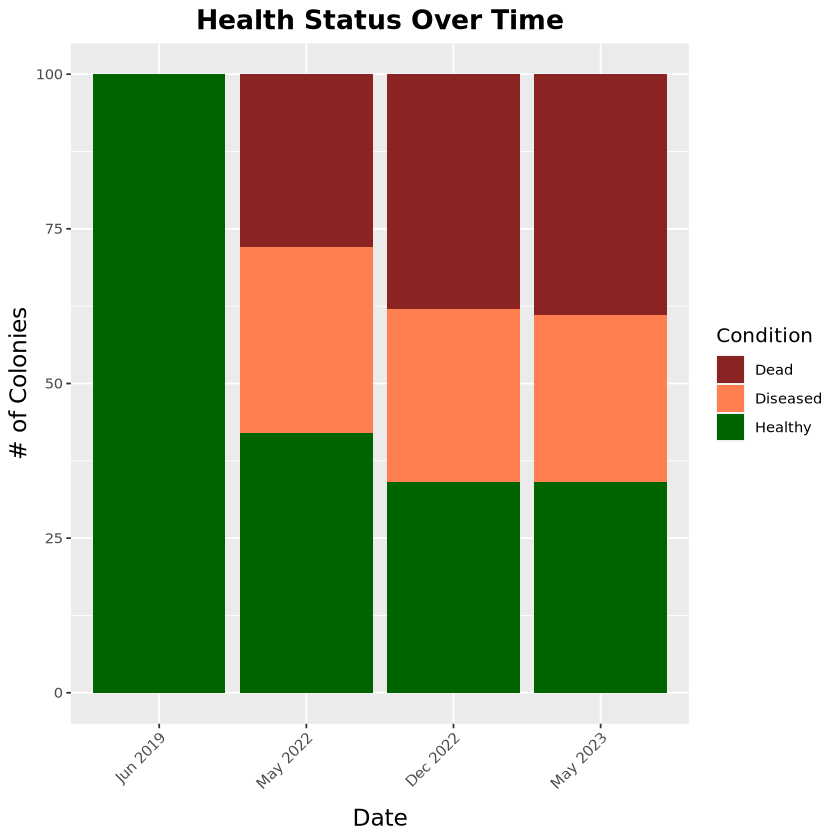

In [82]:
# Reshape the data for plotting
disease_df_long <- disease_df %>%
  mutate(year = rownames(disease_df)) %>%
  pivot_longer(-year, names_to = "month_year", values_to = "condition")

# Convert month_year to a factor with correct order of levels
disease_df_long <- disease_df_long %>%
  mutate(month_year = factor(month_year, levels = unique(month_year)))

# specify condition colors
condition_colors <- c("Healthy" = "darkgreen", "Diseased" = "coral", "Dead" = "brown4")

# Plot the data with stacked bars and custom colors
ggplot(disease_df_long, aes(x = month_year, fill = condition)) +
  geom_bar(position = "stack", stat = "count") +  # Stacked bars
  scale_fill_manual(values = condition_colors) +  # Custom fill colors
  labs(x = "Date", y = "# of Colonies", title = "Health Status Over Time", fill = "Condition") + # Custom legend title
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Rotate x-axis labels
        axis.title = element_text(size = 14),  # Axis titles font size
        axis.title.x = element_text(margin = margin(t = 10)),
        legend.title = element_text(size = 12),  # Legend title settings
        plot.title = element_text(size = 16, hjust = 0.5, face = "bold")) 

## Species Disease Tracking

In [65]:
colony_data[,"Year_tagged"]

[1] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
 [11] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
 [21] "2019" "2022" "2022" "2022" "2022" "2022" "2019" "2019" "2019" "2019"
 [31] "2019" "2019" "2019" "2019" "2019" "2019" NA     NA     NA     NA    
 [41] NA     "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
 [51] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
 [61] "2019" "2019" "2019" "2019" "2019" "2019" "2022" "2022" "2022" "2022"
 [71] "2022" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
 [81] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
 [91] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
[101] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019"
[111] "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2019" "2022" "2022"
[121] "2022" "2022" "2022" "2022" "2022" "2022" "2022" "2022" "2022" "2022"
[131] "2019" "2019" "2019" "2022" "2022" "2022" "2022" "2022" "2022" "2022"
[141] "2022" "2022" "2022" "2022" "2022" "2022" "2022" "2022" "2022" "2024"
[151] "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024"
[161] "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024"
[171] "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024" "2024"
[181] "2024" "2024" "2024" "2024" "2024" "2024"

In [66]:
# look at na's 
colony_data[(is.na(colony_data["Year_tagged"])),]
# i don't know what to do with them right now so I'm going to remove them 

,X,Date_InitialTag,Transect,TransectNum,OldTagNuim,NewTagNum,Species,Meter,Meters_90,Direction,⋯,MaxDiameter,Height,Date_DocumentedDisease,Date_DocumentedMortality,Notes_May2022,Sept_2023,Nov_2023,Dec_2023,Jan_2024,Year_tagged
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
37,NA,,SR30N,2,NA,28,PSTR,15.6,1.2,right,⋯,37,25,12/4/22,9/26/23,,Dead,NA,NA,,NA
38,NA,,SR30N,2,NA,29,OFAV,16.0,1.1,right,⋯,40,40,Healthy,Healthy,"50% Bleach, 100% Pale",,Not Visited,Not Visited,,NA
39,NA,,SR30N,2,NA,30,OANN,21.6,4.2,left,⋯,65,50,12/4/22,Diseased,,,Not Visited,Not Visited,,NA
40,NA,,SR30N,2,NA,31,DLAB,23.0,2.7,left,⋯,39,18,Healthy,Healthy,,,Not Visited,Not Visited,,NA
41,NA,,SR30N,2,NA,32,PSTR,5.0,5.0,right,⋯,20,18,Healthy,Healthy,,100%Pale,Not Visited,Not Visited,,NA


In [67]:
#remove colonies with 'na' in year_tagged
#colony_data <- drop_na(colony_data,"Year_tagged")
# remove colonies tagged in 2024 
colony_no2024 <- subset(colony_data, Year_tagged!=2024) 

In [71]:
#filter for disease in 2022
disease_2022_count <- colony_no2024 %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

#filter for death in 2022
death_2022_count <- colony_no2024 %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 
percent_disease <- (nrow(disease_2022_count)/nrow(colony_no2024))*100
percent_mortality <- (nrow(death_2022_count)/nrow(colony_no2024))*100

cat("Percent of colonies that got diseased in 2022:", percent_disease)
cat("
Number of colonies that died in 2022:", percent_mortality)
cat("
Total percentage of colonies affected by sctld", percent_disease+percent_mortality)

Percent of colonies that got diseased in 2022: 29.86111
Number of colonies that died in 2022: 26.38889
Total number of colonies affected by sctld 56.25

In [31]:
#Goal: calculate % of mcav that got disease from 2019 to 2022

In [34]:
# sort for mcav only 
colony_mcav <- subset(colony_no2024, Species=="MCAV") 

In [58]:
#filter for disease in 2022
disease_mcav2022_count <- colony_mcav %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedDisease))

death_mcav2022_count <- colony_mcav %>%
  filter(grepl("\\d{1,2}/\\d{1,2}/22", Date_DocumentedMortality)) 

cat("Percent of mcav colonies that got diseased in 2022:", (nrow(disease_mcav2022_count)/nrow(colony_mcav))*100)
cat("
Number of mcav colonies that died in 2022:", (nrow(death_mcav2022_count)/nrow(colony_mcav))*100)
#nrow(colony_mcav)

Percent of mcav colonies that got diseased in 2022: 32.25806
Number of mcav colonies that died in 2022: 38.70968

In [ ]:
### STOP HERE

In [ ]:
colonies_2019 <- colonies_2019 %>%
  mutate("2019" = "Healthy")

In [ ]:
#establish pattern that selects colonies that got disease in May 2022
may_pattern <- grepl("5/\\d{1,2}/22", colonies_2019$Date_DocumentedDisease, fixed = FALSE)
may_dead_pattern <- grepl("5/\\d{1,2}/22", colonies_2019$Date_DocumentedMortality, fixed = FALSE)

In [ ]:
# create column for 2022
colonies_2019_may2022 <- colonies_2019 %>%
  mutate(May2022 =
         case_when(
             may_dead_pattern ~ "Dead",
             may_pattern ~ "Diseased",
             grepl("Healthy", Date_DocumentedDisease)  ~ "Healthy",
             grepl("Unknown", Date_DocumentedDisease) ~ "Unknown",
             TRUE ~ "Healthy")  # Add "Healthy" for any other case
           )


In [ ]:
# Remove rows where both Date_DocumentedDisease and Date_DocumentedMortality are NA
colonies_2019_may2022_delete <- colonies_2019_may2022 %>%
  filter(!(is.na(Date_DocumentedDisease) & is.na(Date_DocumentedMortality)))
nrow(colonies_2019_may2022_delete)
tail(colonies_2019_may2022_delete)

In [ ]:
#establish pattern that selects colonies that got disease in Dec 2022
dec_pattern <- grepl("12/\\d{1,2}/22", colonies_2019_may2022_delete$Date_DocumentedDisease, fixed = FALSE)
dec_dead_pattern <- grepl("12/\\d{1,2}/22", colonies_2019_may2022_delete$Date_DocumentedMortality, fixed = FALSE)
# just looking at how many there are 
sum(dec_pattern)
sum(dec_dead_pattern)

In [ ]:
colonies_2019_2022 <- colonies_2019_may2022_delete %>%
  mutate(Dec2022 =
           case_when(
             dec_dead_pattern ~ "Dead",
               dec_pattern ~ "Diseased",
             grepl("Healthy", Date_DocumentedDisease) ~ "Healthy",
             grepl("Diseased", Date_DocumentedMortality) ~ "Diseased",
             TRUE ~ as.character(May2022)  # Use May2022 when the date doesn't match the pattern
           )
         )
         
head(colonies_2019_2022[,15:25])